In [32]:
from comchoice import voting
from comchoice import datasets

In [22]:
print("To check the library, you can use the help function:")
help(pairwise)

To check the library, you can use the help function:
Help on module comchoice.pairwise in comchoice:

NAME
    comchoice.pairwise

CLASSES
    builtins.object
        Pairwise
    
    class Pairwise(builtins.object)
     |  Pairwise(df)
     |  
     |  Pairwise.
     |  
     |  The class `Pairwise` includes methods to manage pairwise comparison data.
     |  For instance, allows to rank candidates, to convert rating-based data
     |  into pairwise comparison data, and calculates divisiveness.
     |  
     |  Attributes
     |  ----------
     |  candidate: str
     |      Column name that includes the candidates.
     |  card_id : str
     |      Unique identifier column name of candidates' pairs.
     |  option_a: str
     |      Column name of the candidate A.
     |  option_b: str
     |      Column name of the candidate B.
     |  selected: str, default="selected"
     |      Column name of the candidate selected.
     |  value: str, default="value"
     |  voter: str, default

<div class="alert alert-info">
    <strong>Goal: </strong> explain how we can use the platform to pairwise comparison.<br/>
</div>

In [76]:
data = datasets. load_synthetic_pairwise(n_candidates=5, n_voters=100, ties=False,\
                                         transitive=True, weight_tie=0.1)
data.head()

,voter,option_a,option_b,selected
0,1,3,4,4
1,1,5,4,4
2,1,4,2,4
3,1,1,4,4
4,1,5,3,3


<div class="alert alert-info">
    <strong>Initialize Pairwise class</strong> 
</div>

In [77]:
from comchoice.pairwise import Pairwise
comparison = Pairwise(data)
comparison.fit() # fit the data to update columns

<div class="alert alert-info">
    <strong>Compute divisiveness:</strong> calculate how much a population disagrees that one candidate is the best option.
</div>

In [86]:
divisiveness = comparison.divisiveness()
divisiveness.sort_values(by='value', ascending=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.33it/s]


,candidate,value
2,3,0.564088
3,4,0.507693
0,1,0.494033
1,2,0.481525
4,5,0.456366


<div class="alert alert-info">
    <strong>Compute win rate:</strong> calculate how much a population agrees that one candidate is the best option.
</div>

In [87]:
win_rate = comparison.win_rate().sort_values(by='value', ascending=False)
win_rate.head()

,candidate,value
4,5,0.5325
1,2,0.5150
2,3,0.4925
3,4,0.4825
0,1,0.4775


<AxesSubplot:xlabel='candidate'>

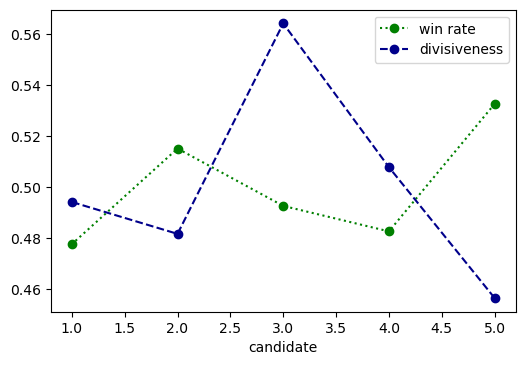

In [109]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=100)
win_rate.sort_values(by='candidate', ascending=False)\
        .plot(x='candidate',y='value', marker='o', linestyle="dotted", ax=ax,\
              label='win rate', color='green')
divisiveness.sort_values(by='candidate', ascending=False)\
        .plot(x='candidate',y='value', marker='o', linestyle="dashed", ax=ax, \
              label='divisiveness', color='darkblue')